In [243]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [215]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

## Clients

In [3]:
df1 = pd.read_csv("data/Client_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df1.head()

ÿSalonID                  ClientID       FirstName        LastName Address  \
0      907              ..8220484146         Shankar             NaN     NaN   
1      907               .8393863665           shubh             NaN     NaN   
2      907               .9894384197            Rafi  rufi9888800870     NaN   
3      907  .C Balachander9884886817  .C Balachander             NaN     NaN   
4      907                         0          Walkin       -Customer     NaN   

   City  State  Zip   HomePhone  WorkPhone  ...    Membership_expiryDate  \
0   NaN    NaN  NaN  8220484146        NaN  ...  1990-01-01 00:00:00.000   
1   NaN    NaN  NaN  8393863665        NaN  ...  1990-01-01 00:00:00.000   
2   NaN    NaN  NaN  9894384197        NaN  ...  1990-01-01 00:00:00.000   
3   NaN    NaN  NaN  9884886817        NaN  ...  1990-01-01 00:00:00.000   
4   NaN    NaN  NaN         154        NaN  ...                      NaN   

  chksms Studio_Client add_on_card addoncreated_Date PhotoPath2  \
0    1.0           0.0         NaN               NaN  nopicture   
1    1.0           0.0         NaN               NaN  nopicture   
2    1.0           0.0         NaN               NaN  nopicture   
3    1.0           0.0         NaN               NaN  nopicture   
4    1.0           0.0         NaN               NaN  nopicture   

   CustomerGSTNO  Walletcardno Walletcheck mem_card_oth_outlets  
0              0           NaN         NaN                  NaN  
1              0           NaN         NaN                  NaN  
2              0           NaN         NaN                  NaN  
3            NaN           NaN         NaN                  NaN  
4            NaN           NaN         NaN                  NaN  

[5 rows x 59 columns]

In [4]:
df1.describe()

City  State     WorkPhone  Spl_instruction  Total_Visits    Balance  \
count  30.0    0.0  1.180000e+02     26732.000000  1.100000e+01  31.000000   
mean    0.0    NaN  6.423571e+09         0.146491  7.043405e+05   0.967742   
std     0.0    NaN  4.211900e+09         0.353604  4.210434e+05   0.179605   
min     0.0    NaN  0.000000e+00         0.000000  0.000000e+00   0.000000   
25%     0.0    NaN  3.020775e+04         0.000000  4.963250e+05   1.000000   
50%     0.0    NaN  8.939469e+09         0.000000  5.851230e+05   1.000000   
75%     0.0    NaN  9.665945e+09         0.000000  1.014850e+06   1.000000   
max     0.0    NaN  9.995264e+09         1.000000  1.376456e+06   1.000000   

       Std_Discount  SkinType  HairType         RowNo  ...  PrivelageCardNo  \
count          31.0       0.0       0.0  26702.000000  ...              2.0   
mean            0.0       NaN       NaN  49035.712756  ...           3001.0   
std             0.0       NaN       NaN  13260.879879  ...              0.0   
min             0.0       NaN       NaN      2.000000  ...           3001.0   
25%             0.0       NaN       NaN  39308.250000  ...           3001.0   
50%             0.0       NaN       NaN  45986.500000  ...           3001.0   
75%             0.0       NaN       NaN  52673.750000  ...           3001.0   
max             0.0       NaN       NaN  86316.000000  ...           3001.0   

       Privelage_Check  OpeningPoints  member_check        chksms  \
count          26671.0            0.0  26672.000000  26672.000000   
mean               0.0            NaN      0.232304      0.998875   
std                0.0            NaN      0.422309      0.033519   
min                0.0            NaN      0.000000      0.000000   
25%                0.0            NaN      0.000000      1.000000   
50%                0.0            NaN      0.000000      1.000000   
75%                0.0            NaN      0.000000      1.000000   
max                0.0            NaN      1.000000      1.000000   

       Studio_Client  add_on_card  addoncreated_Date  Walletcheck  \
count        26672.0          0.0                0.0         16.0   
mean             0.0          NaN                NaN          1.0   
std              0.0          NaN                NaN          0.0   
min              0.0          NaN                NaN          1.0   
25%              0.0          NaN                NaN          1.0   
50%              0.0          NaN                NaN          1.0   
75%              0.0          NaN                NaN          1.0   
max              0.0          NaN                NaN          1.0   

       mem_card_oth_outlets  
count          2.605000e+03  
mean           2.165291e+06  
std            8.453795e+06  
min            0.000000e+00  
25%            2.140460e+05  
50%            6.340980e+05  
75%            1.248520e+06  
max            9.952948e+07  

[8 rows x 25 columns]

In [5]:
len(df1['ClientID'].unique())

26703

In [6]:
len(df1)

26734

In [7]:
df1['category'].value_counts()

Walkin 1     15249
Repeat 1      6817
Loyal 1       1967
Regular 1     1555
Freq 1        1083
Unknown          1
Name: category, dtype: int64

## Service Sales

In [162]:
df3 = pd.read_excel("data/New_Ticket_Product_Details_14Nov_23.xlsx")
df3.head()

SalonID  TicketID       Mob #                  Client ID   \
0      907         1  9940060569             JERRY9940060569   
1      907         2  9884402095           Saranya9884402095   
2      907         2  9884402095           Saranya9884402095   
3      907         3  9176222704  Lakshmi rajkumar9176222704   
4      907         3  9176222704  Lakshmi rajkumar9176222704   

        Client Name  Mob #.1    ProdID       Group1   Sub grp    EmpID  ...  \
0             JERRY      NaN  GHHCUTNR          NaN       NaN  9079999  ...   
1           Saranya      NaN  LHHCUTAD  Ladies Hcut  Adv Hcut  9079999  ...   
2           Saranya      NaN  LSTHDGEB          NaN       NaN  9079999  ...   
3  Lakshmi rajkumar      NaN  LBMANIFR          NaN       NaN  9079999  ...   
4  Lakshmi rajkumar      NaN  LSTHDGEB          NaN       NaN  9079999  ...   

  bomreference                TimeMark     RowNo  Status  Billformat  \
0          NaN 2014-09-09 12:43:59.043  205478.0       U           D   
1          NaN 2014-09-09 12:43:59.027  205479.0       U           D   
2          NaN 2014-09-09 12:43:59.027  205480.0       U           D   
3          NaN 2014-09-09 12:43:59.027  205482.0       U           D   
4          NaN 2014-09-09 12:43:59.027  205481.0       U           D   

   luxurytax  Studio_Status  Mem_Disc  Oth_Disc  Created_Date2  
0        0.0              N       0.0       0.0     2013-08-27  
1        0.0              N       0.0       0.0     2013-08-28  
2        0.0              N       0.0       0.0     2013-08-28  
3        0.0              N       0.0       0.0     2013-08-28  
4        0.0              N       0.0       0.0     2013-08-28  

[5 rows x 33 columns]

In [163]:
df3.describe()

SalonID       TicketID  Mob #.1         EmpID            Qty  \
count  288760.0  288760.000000      0.0  2.887600e+05  286669.000000   
mean      907.0   73819.692149      NaN  1.131305e+06       1.025367   
std         0.0   41291.816167      NaN  2.118174e+06       0.261317   
min       907.0       1.000000      NaN  0.000000e+00       0.000000   
25%       907.0   37995.000000      NaN  4.100190e+05       1.000000   
50%       907.0   75267.500000      NaN  4.126340e+05       1.000000   
75%       907.0  112473.250000      NaN  9.019110e+05       1.000000   
max       907.0  140155.000000      NaN  9.079999e+06      35.000000   

                 Tax  BackBar   Retail_Price   Discount_Amt  Discount_Perct  \
count  286669.000000      0.0  286669.000000  286669.000000   286669.000000   
mean       15.816145      NaN     347.412619      50.643943        0.438328   
std         3.107144      NaN     645.148796     117.397838        3.287732   
min         0.000000      NaN       0.000000       0.000000        0.000000   
25%        14.000000      NaN      55.000000       5.000000        0.000000   
50%        18.000000      NaN     150.000000      15.000000        0.000000   
75%        18.000000      NaN     275.000000      35.000000        0.000000   
max        28.000000      NaN   20199.000000    4632.000000      100.000000   

               Total            wid  bomreference          RowNo  luxurytax  \
count  286669.000000  286669.000000          17.0  286669.000000   286669.0   
mean      354.873780     497.791732           0.0  356434.668695        0.0   
std       679.492683      43.377934           0.0   94975.578838        0.0   
min         0.000000       0.000000           0.0  205478.000000        0.0   
25%        59.000000     501.000000           0.0  277214.000000        0.0   
50%       147.500000     502.000000           0.0  348881.000000        0.0   
75%       284.380000     502.000000           0.0  420548.000000        0.0   
max     23834.820000     503.000000           0.0  564055.000000        0.0   

            Mem_Disc       Oth_Disc  
count  286669.000000  286669.000000  
mean       41.862723       6.492171  
std        98.787865      57.881399  
min         0.000000    -240.000000  
25%         0.000000       0.000000  
50%        15.000000       0.000000  
75%        35.000000       0.000000  
max      2875.000000    4625.000000

In [164]:
len(df3)

288760

In [165]:
df4 = pd.read_csv("data/Tickets_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df4.head()

ÿSalonID TicketID                    ClientID                  SchDate  \
0      907        1             JERRY9940060569  2013-08-27 00:00:00.000   
1      907        2           Saranya9884402095  2013-08-28 00:00:00.000   
2      907        3  Lakshmi rajkumar9176222704  2013-08-28 00:00:00.000   
3      907        4          Vaishali8056111666  2013-08-28 00:00:00.000   
4      907        5            Sudeep9381057770  2013-08-28 00:00:00.000   

  Referral   Total             Created_Date  Total_WithoutTax  printed  \
0  Request  146.07  2013-08-27 00:00:00.000             130.0      0.0   
1  Request  477.53  2013-08-28 00:00:00.000             425.0      0.0   
2  Request  320.23  2013-08-28 00:00:00.000             285.0      0.0   
3  Request   56.18  2013-08-28 00:00:00.000              50.0      0.0   
4  Request   95.51  2013-08-28 00:00:00.000              85.0      0.0   

   bomreferenceindex                 TimeMark     RowNo Status  Serviceslipno  \
0                NaN  2013-08-27 18:13:22.023  108263.0      i      1111111.0   
1                NaN  2013-08-28 10:52:27.833  108264.0      i       111112.0   
2                NaN  2013-08-28 10:55:35.253  108265.0      i       111113.0   
3                NaN  2013-08-28 10:57:18.620  108266.0      i       111114.0   
4                NaN  2013-08-28 10:58:54.560  108267.0      i       111115.0   

                                         servicedesc BillStatus  
0                                    HAIRCUT (GENTS)     Closed  
1  HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)/...     Closed  
2  THREADING - EYEBROWS (LADIES)/MANICURE - FRENC...     Closed  
3  THREADING - EYEBROWS (LADIES)/THREADING - UPPE...     Closed  
4      KIDS CUT - BELOW 10 YEARS - WEEK DAYS (GENTS)     Closed

In [166]:
len(df4)

142267

In [167]:
len(df4['ClientID'].unique())

26045

In [168]:
df4.dropna(subset=['ClientID'], inplace=True)

In [169]:
len(df4['ClientID'].unique())

26044

# Customer Segmentation

### RFM Analysis

By creating segments, businesses can tailor their marketing efforts, product offerings, and customer service experiences to better meet the specific needs of each segment.

Questions:
- Who are frequent customers?
- Who are recent (new) customers?
- Who are high-paying customers
- What are the services purchased by the 3 groups?

### Total Transactions per Customer

1. Sum number of services taken by customer

In [170]:
# Try to convert the 'column_name' to int64, handling errors
try:
    df4['TicketID'] = df4['TicketID'].astype('int64')
except ValueError:
    # Handle non-numeric values, for example, replacing them with NaN
    df4['TicketID'] = pd.to_numeric(df4['TicketID'], errors='coerce')

In [171]:
df3['Bill_DateTime'] = pd.to_datetime(df3['Created_Date2'], format='%d-%m-%Y %H:%M', errors='coerce')

df3['Bill_Date'] = df3['Bill_DateTime'].dt.date
df3['Bill_Time'] = df3['Bill_DateTime'].dt.time

df3 = df3.drop(columns=['Bill_DateTime', 'Created_Date2'])
df3['Bill_Date'] = pd.to_datetime(df3['Bill_Date'])

df3.sample(1)

SalonID  TicketID       Mob #        Client ID  Client Name  Mob #.1  \
135656      907     70734  9444186385  ambika9444186385      ambika      NaN   

          ProdID Group1 Sub grp   EmpID  ...                TimeMark  \
135656  KHHCUTLE    NaN     NaN  412626  ... 2017-08-27 18:14:11.820   

           RowNo Status  Billformat  luxurytax  Studio_Status  Mem_Disc  \
135656  341202.0      i           D        0.0              N      25.0   

        Oth_Disc  Bill_Date  Bill_Time  
135656       0.0 2017-08-27   00:00:00  

[1 rows x 34 columns]

In [172]:
df3['NumServices'] = df3[df3['Type'] == 'S'].groupby('TicketID')['TicketID'].transform('count')
df4['NumVisits'] = df4.groupby(['ClientID'])['ClientID'].transform('count')
df4['TotalSpend'] = df4.groupby(['ClientID'])['Total'].transform('sum')

In [173]:
df4['Created_Date'] = pd.to_datetime(df4['Created_Date'])
df4['Created_Date'].max()

Timestamp('2023-11-14 00:00:00')

In [174]:
cutoff_date = df4['Created_Date'].max()

# Calculate recency
df4['DaysSinceLastVisit'] = (cutoff_date - df4.groupby('ClientID')['Created_Date'].transform('max')).dt.days

In [175]:
# Performing an inner merge based on the common column 'customer_id'
df3_temp = df3[['TicketID', 'NumServices', 'Bill_Date']]
df4_temp = df4[['TicketID', 'ClientID', 'TotalSpend', 'NumVisits', 'TotalSpend', 'DaysSinceLastVisit']]
merge_temp = pd.merge(df3_temp, df4_temp, on='TicketID', how='left')
merge_temp.head()

TicketID  NumServices  Bill_Date                    ClientID  TotalSpend  \
0         1          1.0 2013-08-27             JERRY9940060569    15926.10   
1         2          2.0 2013-08-28           Saranya9884402095    16336.90   
2         2          2.0 2013-08-28           Saranya9884402095    16336.90   
3         3          2.0 2013-08-28  Lakshmi rajkumar9176222704    35250.54   
4         3          2.0 2013-08-28  Lakshmi rajkumar9176222704    35250.54   

   NumVisits  TotalSpend  DaysSinceLastVisit  
0         38    15926.10                1466  
1         25    16336.90                2098  
2         25    16336.90                2098  
3         46    35250.54                 218  
4         46    35250.54                 218

In [176]:
len(merge_temp)

288760

In [177]:
merge_temp.drop_duplicates(inplace = True)
len(merge_temp)

142749

In [178]:
# merge_temp['NumServicesT'] = merge_temp.groupby(['ClientID'])['NumServices'].transform('sum')
# merge_temp

In [179]:
merge_temp[merge_temp['ClientID'].duplicated() == True]

TicketID  NumServices  Bill_Date                    ClientID  \
17            13          2.0 2013-08-28           anuthya8148603055   
31            20          5.0 2013-08-28  Lakshmi rajkumar9176222704   
39            23          2.0 2013-08-28              gico9894189019   
48            27          2.0 2013-08-29         sivakumar9884049020   
51            29          NaN 2013-08-29           kesavan9444024013   
...          ...          ...        ...                         ...   
288751    140151          1.0 2023-11-14               Ram9840625267   
288752    140152          1.0 2023-11-14             Sayed9840092829   
288753    140153          1.0 2023-11-14            sindhu8220369869   
288754    140154          2.0 2023-11-14        jiya kumar9994691502   
288756    140155          4.0 2023-11-14           vignesh9566176618   

        TotalSpend  NumVisits  TotalSpend  DaysSinceLastVisit  
17         2290.44          9     2290.44                1914  
31        35250.54         46    35250.54                 218  
39          426.98          2      426.98                3730  
48        18166.88         18    18166.88                3027  
51        12059.05         63    12059.05                  12  
...            ...        ...         ...                 ...  
288751    15385.85         53    15385.85                   0  
288752    19020.40         19    19020.40                   0  
288753    38484.95        118    38484.95                   0  
288754     1438.42          2     1438.42                   0  
288756     1528.10          2     1528.10                   0  

[116705 rows x 8 columns]

In [180]:
yearly_services = pd.DataFrame(merge_temp.groupby([merge_temp['ClientID'], merge_temp['Bill_Date'].dt.year])['NumServices'].sum().fillna(0))
yearly_services['avg_yrly_services'] = yearly_services.groupby('ClientID')['NumServices'].transform('mean')
yearly_services.reset_index(inplace=True)
yearly_services.drop(columns=['Bill_Date', 'NumServices'], inplace=True)
yearly_services.drop_duplicates(inplace=True)
yearly_services.head()

ClientID  avg_yrly_services
0              ..8220484146           0.666667
3               .8393863665           3.000000
4               .9894384197           9.000000
6  .C Balachander9884886817           3.666667
9                         0          63.000000

In [181]:
len(yearly_services)

25975

In [182]:
monthly_services = pd.DataFrame(merge_temp.groupby([merge_temp['ClientID'], merge_temp['Bill_Date'].dt.month])['NumServices'].sum().fillna(0))
monthly_services['avg_mnthly_services'] = monthly_services.groupby('ClientID')['NumServices'].transform('mean')
monthly_services.reset_index(inplace=True)
monthly_services.drop(columns=['Bill_Date', 'NumServices'], inplace=True)
monthly_services.drop_duplicates(inplace=True)
monthly_services.head()

ClientID  avg_mnthly_services
0               ..8220484146             0.666667
3                .8393863665             3.000000
4                .9894384197             2.571429
11  .C Balachander9884886817             3.666667
14                         0            42.000000

In [183]:
len(monthly_services)

25975

In [184]:
client_service_avgs = pd.merge(yearly_services, monthly_services, on='ClientID', how='outer')
client_service_avgs

ClientID  avg_yrly_services  avg_mnthly_services
0                  ..8220484146           0.666667             0.666667
1                   .8393863665           3.000000             3.000000
2                   .9894384197           9.000000             2.571429
3      .C Balachander9884886817           3.666667             3.666667
4                             0          63.000000            42.000000
...                         ...                ...                  ...
25970        ziaulhAQ9943699607           4.000000             4.000000
25971             zil7373165752           4.333333             2.166667
25972            ztya9884450626           1.000000             1.000000
25973          zubair8220237654           4.000000             2.000000
25974             zzz9443679777           2.000000             2.000000

[25975 rows x 3 columns]

In [188]:
df4_subset = df4[['ClientID', 'TotalSpend', 'NumVisits', 'DaysSinceLastVisit']]
sales_df = pd.merge(df4_subset, client_service_avgs, on='ClientID', how='left')
sales_df.head()

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services  
0          11.666667             6.363636  
1           9.000000             5.000000  
2          12.285714             7.818182  
3          14.500000             9.666667  
4           1.000000             1.000000

In [189]:
len(sales_df)

140155

In [190]:
sales_df[sales_df['ClientID'].duplicated() == True]

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
12               anuthya8148603055     2290.44          9                1914   
19      Lakshmi rajkumar9176222704    35250.54         46                 218   
22                  gico9894189019      426.98          2                3730   
26             sivakumar9884049020    18166.88         18                3027   
28               kesavan9444024013    12059.05         63                  12   
...                            ...         ...        ...                 ...   
140150               Ram9840625267    15385.85         53                   0   
140151             Sayed9840092829    19020.40         19                   0   
140152            sindhu8220369869    38484.95        118                   0   
140153        jiya kumar9994691502     1438.42          2                   0   
140154           vignesh9566176618     1528.10          2                   0   

        avg_yrly_services  avg_mnthly_services  
12               3.250000             3.250000  
19              12.285714             7.818182  
22               4.000000             4.000000  
26              17.666667             6.625000  
28               7.500000             6.250000  
...                   ...                  ...  
140150           6.800000             5.666667  
140151          28.000000             4.666667  
140152          22.500000            18.750000  
140153           2.000000             2.000000  
140154           5.000000             5.000000  

[114111 rows x 6 columns]

In [191]:
sales_df.drop_duplicates(inplace=True)
len(sales_df)

26044

In [192]:
sales_df.head()

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services  
0          11.666667             6.363636  
1           9.000000             5.000000  
2          12.285714             7.818182  
3          14.500000             9.666667  
4           1.000000             1.000000

In [193]:
exclude_clients = ['.8220484146', '.8393863665', '.9894384197', 'C Balachander9884886817', '0', '..8220484146']
sales_df = sales_df[~sales_df['ClientID'].isin(exclude_clients)]
sales_df = sales_df[sales_df['ClientID'] != "0"]
len(sales_df)

26040

In [194]:
# sales_df = sales_df.groupby('ClientID', 'NumVisits').agg({'NumVisits': 'sum', 'Total': 'sum'}).reset_index()
# sales_df.rename(columns={'Total': 'total_spending'}, inplace=True)
# sales_df.sample(4)

In [195]:
sales_df.describe()

TotalSpend     NumVisits  DaysSinceLastVisit  avg_yrly_services  \
count   26040.000000  26040.000000        26040.000000       25971.000000   
mean     3915.510929      5.363172         1724.589363           4.256465   
std     10634.688079     11.289712         1099.392848           4.817095   
min         0.000000      1.000000            0.000000           0.000000   
25%       277.300000      1.000000          680.000000           2.000000   
50%      1003.000000      2.000000         1771.000000           3.000000   
75%      3496.195000      4.000000         2651.000000           5.000000   
max    435922.100000    342.000000         3730.000000         174.333333   

       avg_mnthly_services  
count         25971.000000  
mean              2.738494  
std               2.258831  
min               0.000000  
25%               1.285714  
50%               2.000000  
75%               3.250000  
max              50.166667

In [196]:
df1_subset = df1[['ClientID', 'Sex', 'HomePhone']]
df1_subset

ClientID Sex   HomePhone
0                  ..8220484146   M  8220484146
1                   .8393863665   M  8393863665
2                   .9894384197   M  9894384197
3      .C Balachander9884886817   M  9884886817
4                             0   M         154
...                         ...  ..         ...
26729            Zion9500109746   F  9500109746
26730          ZOHARA9150721951   F  9150721951
26731            ztya9884450626   M  9884450626
26732          zubair8220237654   M  8220237654
26733             zzz9443679777   M  9443679777

[26734 rows x 3 columns]

In [198]:
df1_subset = df1_subset.dropna(subset=['ClientID'])

In [199]:
sales_df = sales_df.dropna(subset=['ClientID'])
len(sales_df)

26040

In [200]:
# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(sales_df, df1_subset, on='ClientID', how='left')
len(sales_df)

26040

In [201]:
sales_df.head(2)

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0    JERRY9940060569     15926.1         38                1466   
1  Saranya9884402095     16336.9         25                2098   

   avg_yrly_services  avg_mnthly_services Sex   HomePhone  
0          11.666667             6.363636   M  9940060569  
1           9.000000             5.000000   F  9884402095

In [207]:
grouped = sales_df.groupby('Sex')['TotalSpend'].mean()
grouped

Sex
F    4846.091336
M    3238.085102
f    8075.153636
m    1060.820000
Name: TotalSpend, dtype: float64

In [208]:
sales_df['Sex'] = sales_df['Sex'].apply(lambda x: str(x).upper())

In [344]:
# Drop rows where 'Sex' is NaN
sales_df['Sex'] = sales_df['Sex'].replace("NAN", np.nan)
sales_df_filtered = sales_df[sales_df['Sex'].notna()]

# Group by 'Sex' and calculate the median total spending
grouped = sales_df_filtered.groupby('Sex')['TotalSpend'].mean()
grouped

Sex
F    4849.334551
M    3237.940741
Name: TotalSpend, dtype: float64

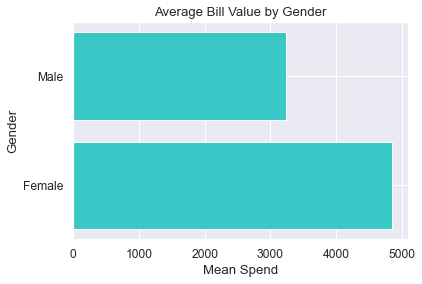

In [345]:
gender_labels = {
    "F": 'Female',
    "M": 'Male'
}

plt.barh([gender_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Mean Spend')
plt.ylabel('Gender')
plt.title('Average Bill Value by Gender')

plt.show()

#### Calculating Recency, Frequency and Monetory

In [212]:
len(sales_df)

26040

In [211]:
sales_df.head()

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services Sex   HomePhone  
0          11.666667             6.363636   M  9940060569  
1           9.000000             5.000000   F  9884402095  
2          12.285714             7.818182   F  9176222704  
3          14.500000             9.666667   F  9884018330  
4           1.000000             1.000000   F  9381057770

In [213]:
sales_df["Monetary"] = sales_df["TotalSpend"]
sales_df["Frequency"] = sales_df["NumVisits"]
sales_df["Recency"] = sales_df["DaysSinceLastVisit"]
sales_df

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0                 JERRY9940060569    15926.10         38                1466   
1               Saranya9884402095    16336.90         25                2098   
2      Lakshmi rajkumar9176222704    35250.54         46                 218   
3              Vaishali8056111666    30872.30         68                 759   
4                Sudeep9381057770      219.11          2                3587   
...                           ...         ...        ...                 ...   
26035           LAVANYA8838935517       53.10          1                   1   
26036           YUVASRI7358451127       64.90          1                   1   
26037          PRASANTH9789074070     1180.00          1                   1   
26038           SUMANTH9941060550     1233.10          1                   1   
26039           kishore9442293006     1699.20          1                   0   

       avg_yrly_services  avg_mnthly_services Sex   HomePhone  Monetary  \
0              11.666667             6.363636   M  9940060569  15926.10   
1               9.000000             5.000000   F  9884402095  16336.90   
2              12.285714             7.818182   F  9176222704  35250.54   
3              14.500000             9.666667   F  9884018330  30872.30   
4               1.000000             1.000000   F  9381057770    219.11   
...                  ...                  ...  ..         ...       ...   
26035           1.000000             1.000000   M  8838935517     53.10   
26036           1.000000             1.000000   F  7358451127     64.90   
26037           2.000000             2.000000   M  9789074070   1180.00   
26038           3.000000             3.000000   M  9941060550   1233.10   
26039           3.000000             3.000000   M  9442293006   1699.20   

       Frequency  Recency  
0             38     1466  
1             25     2098  
2             46      218  
3             68      759  
4              2     3587  
...          ...      ...  
26035          1        1  
26036          1        1  
26037          1        1  
26038          1        1  
26039          1        0  

[26040 rows x 11 columns]

## Statistics

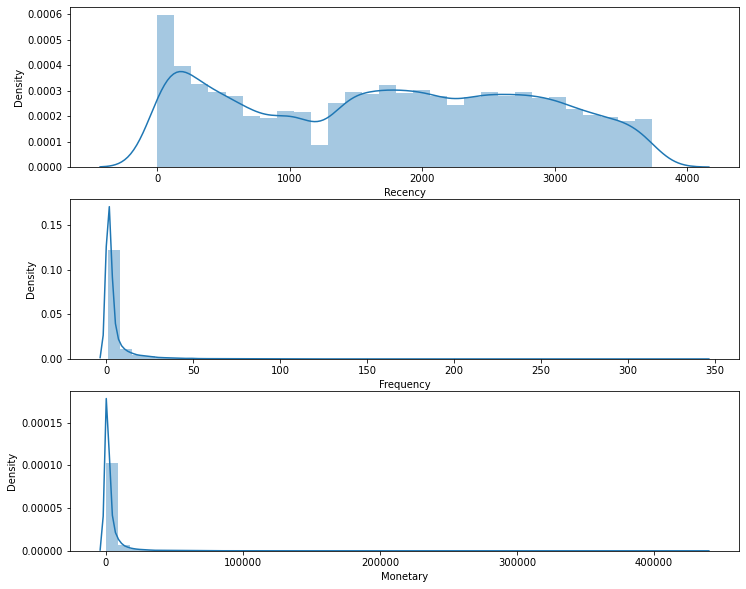

In [216]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(sales_df['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(sales_df['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(sales_df['Monetary'])

# Show the plot
plt.show()

In [217]:
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    # Original distribution
    sns.histplot(sales_df[x], ax=ax[0, 0], bins=50, kde=True)
    ax[0, 0].set_title('Original Distribution')

    # Log-transformed distribution
    log_transformed = np.log1p(sales_df[x])
    sns.histplot(log_transformed, ax=ax[0, 1], bins=50, kde=True)
    ax[0, 1].set_title('Log-Transformed Distribution')

    # Square root-transformed distribution
    sqrt_transformed = np.sqrt(sales_df[x])
    sns.histplot(sqrt_transformed, ax=ax[1, 0], bins=50, kde=True)
    ax[1, 0].set_title('Square Root-Transformed Distribution')

    # Box-Cox-transformed distribution
    boxcox_transformed, _ = stats.boxcox(sales_df[x] + 1)  # Add 1 to handle zero values
    sns.histplot(boxcox_transformed, ax=ax[1, 1], bins=50, kde=True)
    ax[1, 1].set_title('Box-Cox-Transformed Distribution')

    plt.tight_layout()
    plt.show()

    print('Log Transform: Skewness from', sales_df[x].skew().round(2), 'to', log_transformed.skew().round(2))
    print('Square Root Transform: Skewness from', sales_df[x].skew().round(2), 'to', sqrt_transformed.skew().round(2))
    print('Box-Cox Transform: Skewness from', sales_df[x].skew().round(2), 'to', pd.Series(boxcox_transformed).skew().round(2))

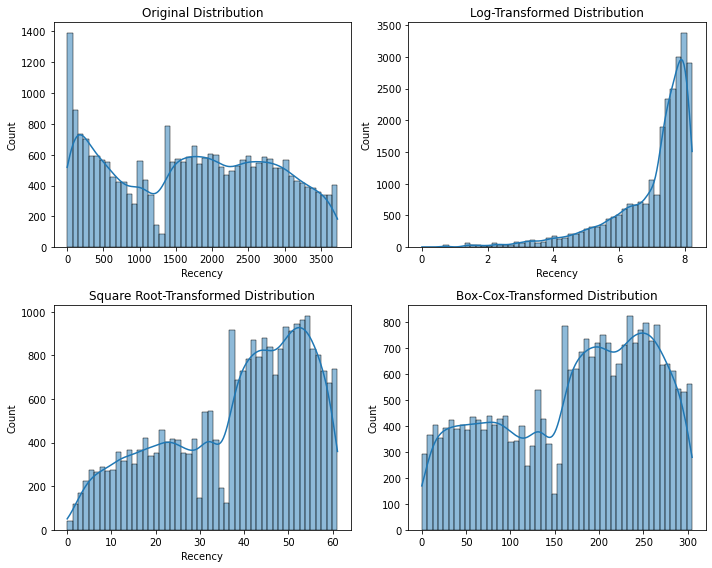

Log Transform: Skewness from -0.0 to -1.82
Square Root Transform: Skewness from -0.0 to -0.58
Box-Cox Transform: Skewness from -0.0 to -0.38


In [218]:
analyze_skewness('Recency')

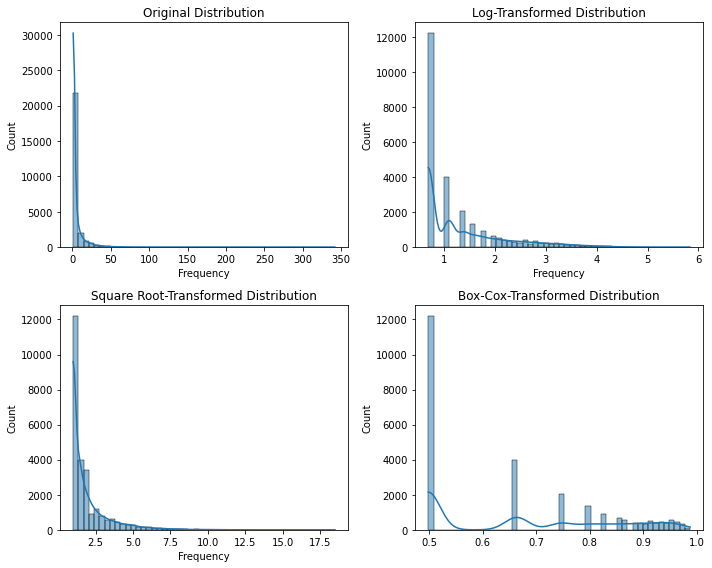

Log Transform: Skewness from 7.2 to 1.5
Square Root Transform: Skewness from 7.2 to 2.73
Box-Cox Transform: Skewness from 7.2 to 0.46


In [219]:
analyze_skewness('Frequency')

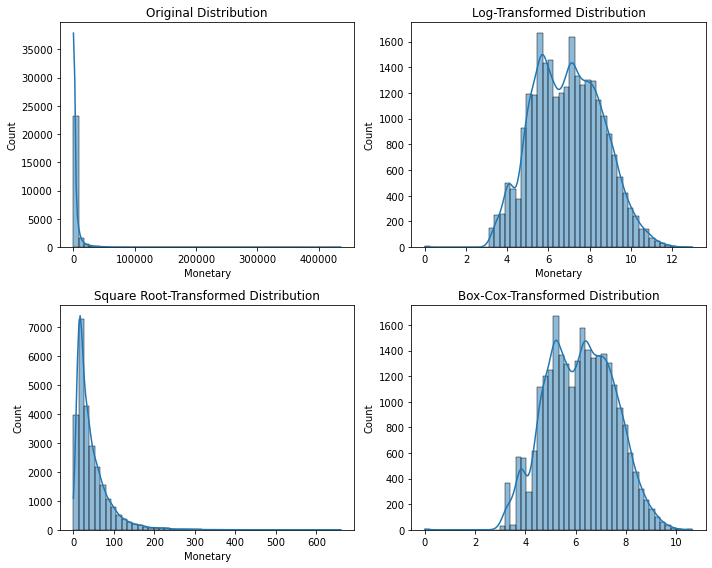

Log Transform: Skewness from 12.13 to 0.13
Square Root Transform: Skewness from 12.13 to 2.82
Box-Cox Transform: Skewness from 12.13 to 0.01


In [220]:
analyze_skewness('Monetary')

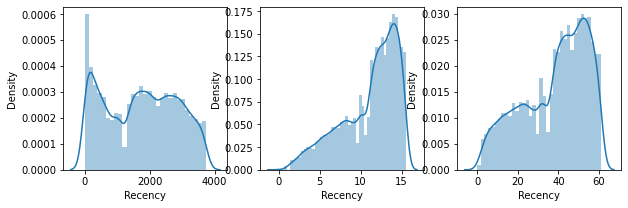

Original Skew -0.0
Cube Root Transformed Skew -0.87
Square Root Transformed Skew -0.58


In [233]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))

sns.distplot(sales_df['Recency'], ax=ax[0])
sns.distplot(np.cbrt(sales_df['Recency']), ax=ax[1])
sns.distplot(np.sqrt(sales_df['Recency']), ax=ax[2])

plt.show()
print(f"Original Skew {sales_df['Recency'].skew().round(2)}")
print(f"Cube Root Transformed Skew {np.cbrt(sales_df['Recency']).skew().round(2)}")
print(f"Square Root Transformed Skew {np.sqrt(sales_df['Recency']).skew().round(2)}")

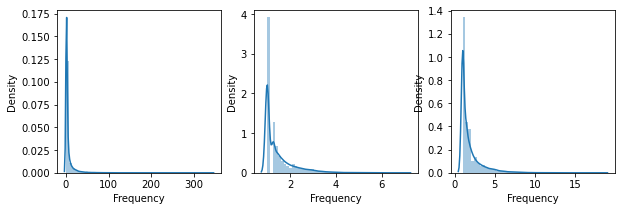

Original Skew 7.2
Cube Root Transformed Skew 2.05
Square Root Transformed Skew 2.73


In [234]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))

sns.distplot(sales_df['Frequency'], ax=ax[0])
sns.distplot(np.cbrt(sales_df['Frequency']), ax=ax[1])
sns.distplot(np.sqrt(sales_df['Frequency']), ax=ax[2])

plt.show()
print(f"Original Skew {sales_df['Frequency'].skew().round(2)}")
print(f"Cube Root Transformed Skew {np.cbrt(sales_df['Frequency']).skew().round(2)}")
print(f"Square Root Transformed Skew {np.sqrt(sales_df['Frequency']).skew().round(2)}")

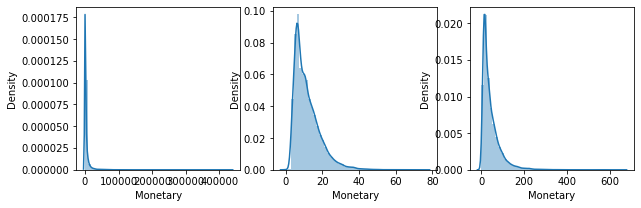

Original Skew 12.13
Cube Root Transformed Skew 1.62
Square Root Transformed Skew 2.82


In [235]:
fig, ax = plt.subplots(1, 3, figsize=(10,3))

sns.distplot(sales_df['Monetary'], ax=ax[0])
sns.distplot(np.cbrt(sales_df['Monetary']), ax=ax[1])
sns.distplot(np.sqrt(sales_df['Monetary']), ax=ax[2])

plt.show()
print(f"Original Skew {sales_df['Monetary'].skew().round(2)}")
print(f"Cube Root Transformed Skew {np.cbrt(sales_df['Monetary']).skew().round(2)}")
print(f"Square Root Transformed Skew {np.sqrt(sales_df['Monetary']).skew().round(2)}")

In [236]:
# Set the Numbers
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = pd.Series(np.cbrt(sales_df['Recency'])).values
# customers_fix["Frequency"] = stats.boxcox(sales_df['Frequency'])[0]
customers_fix["Frequency"] = pd.Series(np.cbrt(sales_df['Frequency'])).values
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(sales_df['Monetary'])).values
customers_fix.tail()

Recency  Frequency  MonetaryValue
26035      1.0        1.0       3.758647
26036      1.0        1.0       4.018663
26037      1.0        1.0      10.567218
26038      1.0        1.0      10.723406
26039      0.0        1.0      11.932959

In [237]:
customers_fix.head()

Recency  Frequency  MonetaryValue
0  11.359991   3.361975      25.159566
1  12.801725   2.924018      25.374055
2   6.018462   3.583048      32.788528
3   9.121801   4.081655      31.370612
4  15.307718   1.259921       6.028659

In [241]:
scaler = StandardScaler()
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)

# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2)) 

[-0.  0.  0.]
[1. 1. 1.]


In [242]:
pd.DataFrame(customers_normalized).head()

0         1         2
0  0.078744  2.971670  1.912129
1  0.495861  2.293352  1.942719
2 -1.466646  3.314071  3.000155
3 -0.568800  4.086324  2.797935
4  1.220885 -0.284033 -0.816281

## Clustering

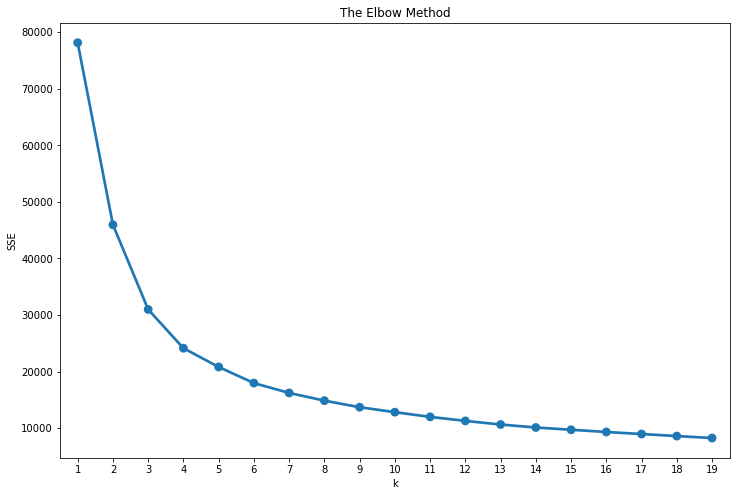

In [244]:
plt.figure(figsize=(12, 8))

K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [245]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(26040,)

In [246]:
sales_df.reset_index()
sales_df.shape

(26040, 11)

In [281]:
sales_df["Cluster"] = model.labels_
sales_df.head()

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services Sex   HomePhone  Monetary  \
0          11.666667             6.363636   M  9940060569  15926.10   
1           9.000000             5.000000   F  9884402095  16336.90   
2          12.285714             7.818182   F  9176222704  35250.54   
3          14.500000             9.666667   F  9884018330  30872.30   
4           1.000000             1.000000   F  9381057770    219.11   

   Frequency  Recency  Cluster  Cluster Segment  
0         38     1466        1  Loyal Customers  
1         25     2098        1  Loyal Customers  
2         46      218        1  Loyal Customers  
3         68      759        1  Loyal Customers  
4          2     3587        0    New Customers

In [282]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = sales_df.index
# df_normalized['Cluster Segment'] = model.labels_
df_normalized['Cluster'] = sales_df['Cluster']
df_normalized.head()

Recency  Frequency  MonetaryValue  ID  Cluster
0  0.078744   2.971670       1.912129   0        1
1  0.495861   2.293352       1.942719   1        1
2 -1.466646   3.314071       3.000155   2        1
3 -0.568800   4.086324       2.797935   3        1
4  1.220885  -0.284033      -0.816281   4        0

In [283]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

ID  Cluster Attribute     Value
0   0        1   Recency  0.078744
1   1        1   Recency  0.495861
2   2        1   Recency -1.466646
3   3        1   Recency -0.568800
4   4        0   Recency  1.220885

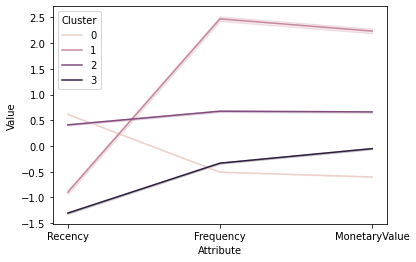

In [284]:
# Assuming 'Attribute', 'Value', and 'Cluster' are column names in your DataFrame
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)
plt.show()

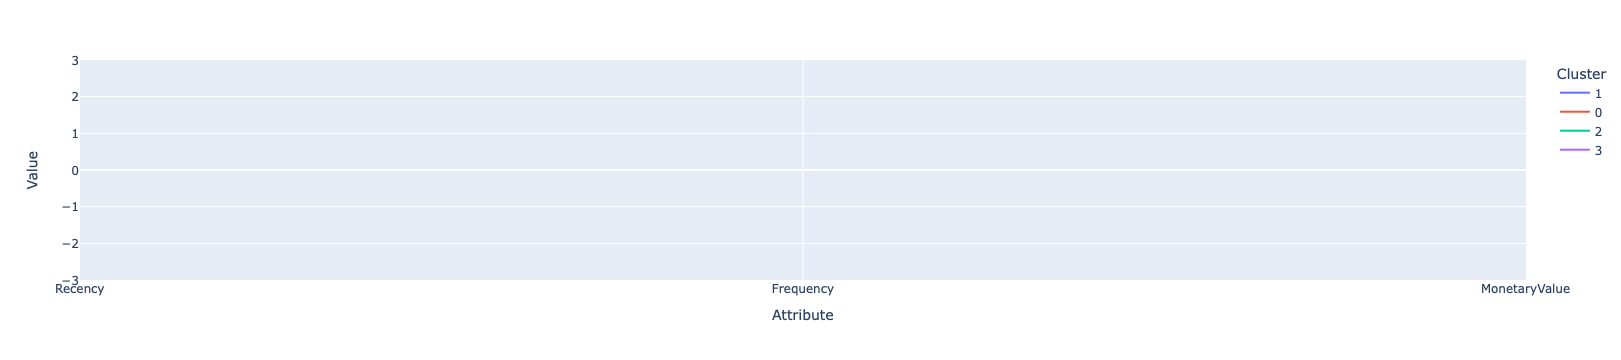

In [285]:
fig = px.line(df_nor_melt, x='Attribute', y='Value', color='Cluster') 
fig.update_yaxes(range=[-3, 3])
fig.show()

In [286]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Cluster  Count  percent
0        0  38187     48.9
1        1   6198      7.9
2        2  15186     19.4
3        3  18549     23.7

In [290]:
sales_df.loc[:, "Cluster Segment"] = ""

sales_df.loc[sales_df.loc[:, "Cluster"] == 3, "Cluster Segment"] = "New Customers"
sales_df.loc[sales_df.loc[:, "Cluster"] == 2, "Cluster Segment"] = "At Risk Customers"
sales_df.loc[sales_df.loc[:, "Cluster"] == 1, "Cluster Segment"] = "Loyal Customers"
sales_df.loc[sales_df.loc[:, "Cluster"] == 0, "Cluster Segment"] = "Churned Customers"

sales_df.reset_index(drop=True, inplace=True)
sales_df.head()

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services Sex   HomePhone  Monetary  \
0          11.666667             6.363636   M  9940060569  15926.10   
1           9.000000             5.000000   F  9884402095  16336.90   
2          12.285714             7.818182   F  9176222704  35250.54   
3          14.500000             9.666667   F  9884018330  30872.30   
4           1.000000             1.000000   F  9381057770    219.11   

   Frequency  Recency  Cluster    Cluster Segment  
0         38     1466        1    Loyal Customers  
1         25     2098        1    Loyal Customers  
2         46      218        1    Loyal Customers  
3         68      759        1    Loyal Customers  
4          2     3587        0  Churned Customers

In [302]:
sales_df.groupby('Cluster Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary       
                     mean      mean     mean  count
Cluster Segment                                    
At Risk Customers  2064.9       7.7   5242.2   5062
Churned Customers  2397.1       1.5    624.8  12729
Loyal Customers     803.4      32.6  25763.2   2066
New Customers       369.4       2.3   2303.8   6183

In [303]:
# Aggregate data by each customer
fig3 = sales_df.groupby('Cluster Segment').agg({'ClientID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'ClientID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Cluster Segment  Count  percent
0  At Risk Customers   5062     19.4
1  Churned Customers  12729     48.9
2    Loyal Customers   2066      7.9
3      New Customers   6183     23.7

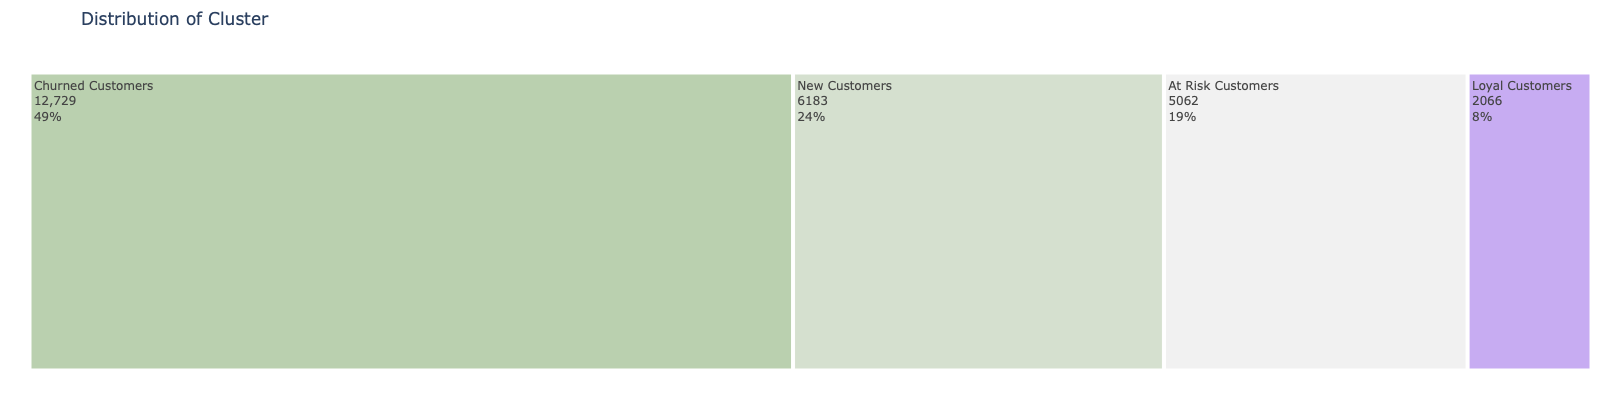

In [306]:
# Creating a Treemap with Plotly Express
colors = ['#bad0af', '#d5e0cf', '#f1f1f1', '#c7acf2'] 

fig = px.treemap(fig3
                    , path=['Cluster Segment'], values='Count',
                 branchvalues="total",  
                 width=800, height=400,
                 title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway=colors,  # defines the colors in the treemap
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [308]:
cluster_avg = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster Segment']].groupby('Cluster Segment').mean()
population_avg = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster Segment']].mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

Recency  Frequency  Monetary
Cluster Segment                                 
At Risk Customers  0.197304   0.441891  0.338822
Churned Customers  0.389931  -0.718257 -0.840433
Loyal Customers   -0.534164   5.074377  5.579781
New Customers     -0.785799  -0.578655 -0.411624

In [317]:
rfm_fig = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster Segment']].copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['Monetary']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

24782/26040 data points remain.
22314/24782 data points remain.
20199/22314 data points remain.


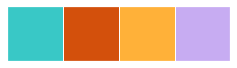

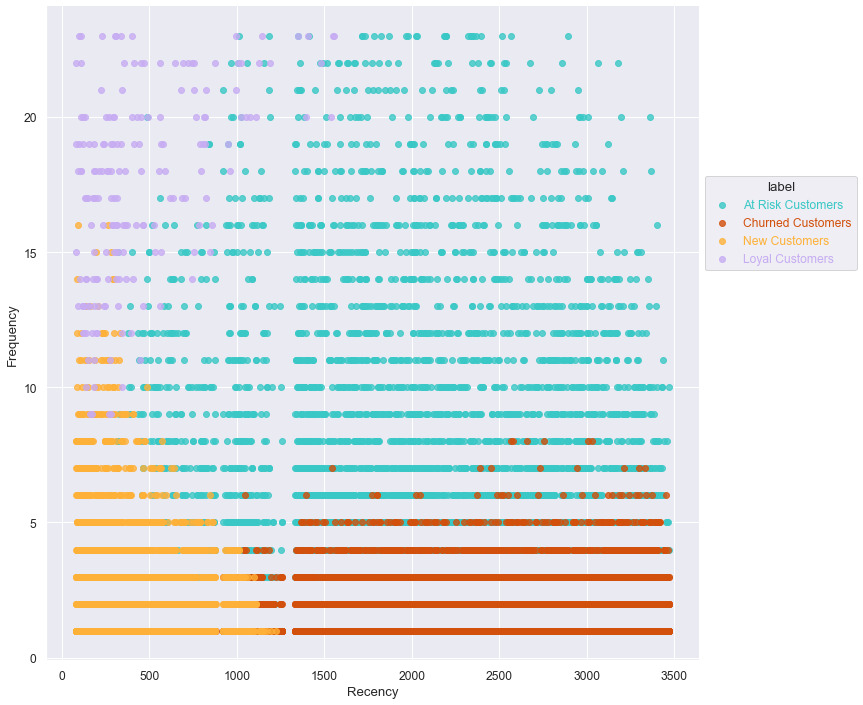

In [343]:
#define a custom palette
customPalette = ['#39C8C6', '#D3500C', '#FFB139', "#c7acf2"]
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Customer ID','Cluster Segment','Recency','Frequency','Monetary'])

#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster Segment', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

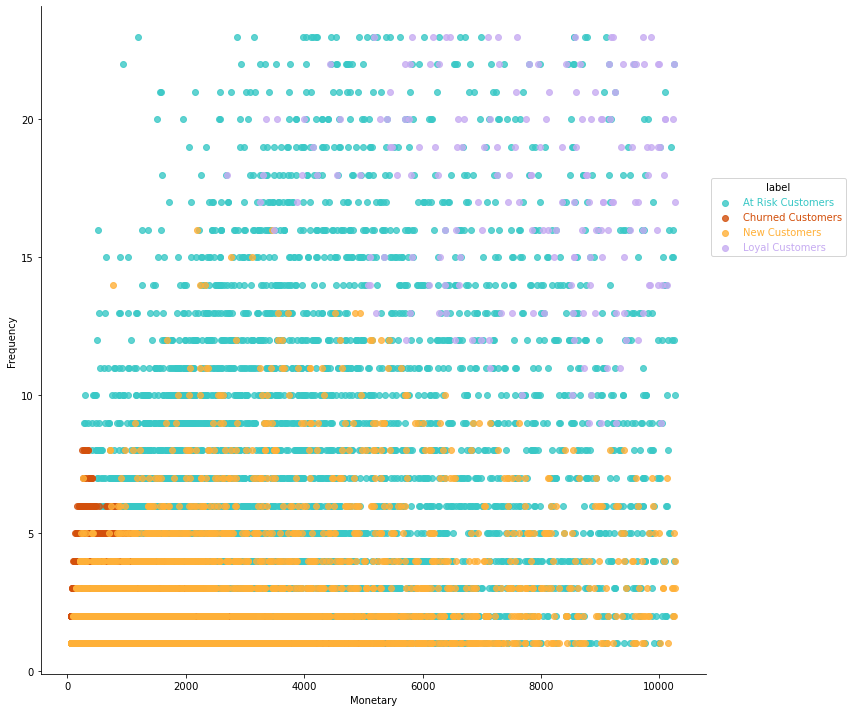

In [319]:
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Monetary', y='Frequency', hue='Cluster Segment', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

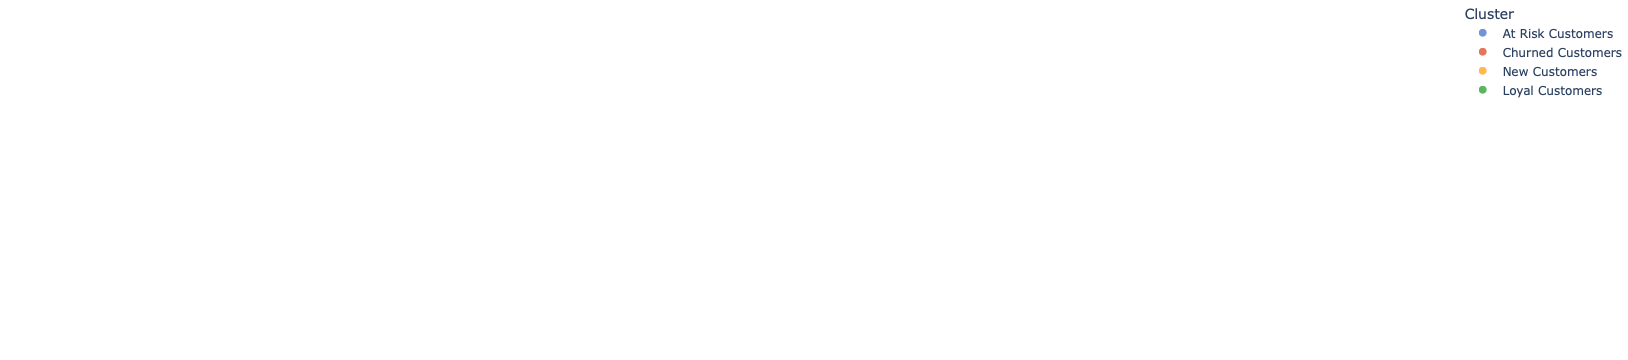

In [320]:
rfm_fig['Cluster'] = rfm_fig['Cluster Segment'].astype(str)

fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='Monetary',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [321]:
cluster_avg = sales_df[['Cluster','Recency','Frequency','Monetary']].groupby(['Cluster']).mean()
population_avg = sales_df[['Recency','Frequency','Monetary']].head().mean()

In [322]:
cluster_avg

Recency  Frequency      Monetary
Cluster                                      
0        2397.059706   1.511038    624.786576
1         803.376573  32.577928  25763.205053
2        2064.856974   7.733109   5242.172013
3         369.408378   2.259744   2303.791024

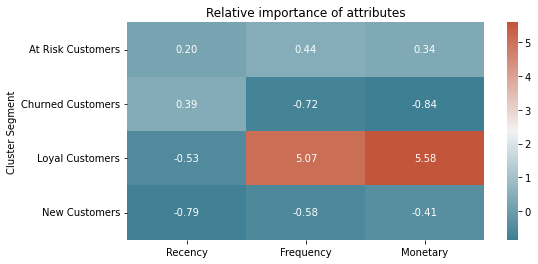

In [324]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

In [325]:
quantiles = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
    
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1   
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
sales_df['R'] = sales_df['Recency'].apply(RScore, args=('Recency',quantiles,))
sales_df['F'] = sales_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
sales_df['M'] = sales_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [326]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
    
sales_df['RFM_Segment'] = sales_df.apply(join_rfm, axis=1)
# Calculate RFM_Score
sales_df['RFM_Score'] = sales_df[['R','F','M']].sum(axis=1)

In [327]:
sales_df['RFM_Segment'].unique()

array(['355', '555', '455', '131', '111', '143', '254', '354', '132',
       '153', '255', '454', '344', '155', '154', '144', '554', '112',
       '142', '134', '343', '133', '114', '145', '243', '244', '233',
       '443', '113', '253', '141', '444', '342', '135', '544', '341',
       '432', '332', '345', '545', '115', '152', '333', '445', '231',
       '242', '334', '442', '434', '353', '352', '234', '533', '542',
       '543', '232', '433', '331', '245', '235', '252', '453', '435',
       '241', '552', '532', '441', '452', '431', '335', '541', '534',
       '553', '211', '212', '214', '213', '215', '535', '531', '312',
       '311', '313', '314', '315', '411', '412', '414', '415', '413',
       '512', '513', '511', '515', '514'], dtype=object)

In [328]:
# Create human friendly RFM labels
segt_map = {
    
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
# rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
sales_df['Segment'] = sales_df['R'].map(str) + sales_df['F'].map(str)
sales_df['Segment'] = sales_df['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
sales_df['Score'] = 'Green'
sales_df.loc[sales_df['RFM_Score']>5,'Score'] = 'Bronze' 
sales_df.loc[sales_df['RFM_Score']>7,'Score'] = 'Silver' 
sales_df.loc[sales_df['RFM_Score']>9,'Score'] = 'Gold' 
sales_df.loc[sales_df['RFM_Score']>10,'Score'] = 'Platinum'
# List the head of the table to view the 
sales_df.head(5)

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services Sex   HomePhone  Monetary  \
0          11.666667             6.363636   M  9940060569  15926.10   
1           9.000000             5.000000   F  9884402095  16336.90   
2          12.285714             7.818182   F  9176222704  35250.54   
3          14.500000             9.666667   F  9884018330  30872.30   
4           1.000000             1.000000   F  9381057770    219.11   

   Frequency  Recency  Cluster    Cluster Segment  R  F  M RFM_Segment  \
0         38     1466        1    Loyal Customers  3  5  5         355   
1         25     2098        1    Loyal Customers  3  5  5         355   
2         46      218        1    Loyal Customers  5  5  5         555   
3         68      759        1    Loyal Customers  4  5  5         455   
4          2     3587        0  Churned Customers  1  3  1         131   

   RFM_Score          Segment     Score  
0         13  Loyal customers  Platinum  
1         13  Loyal customers  Platinum  
2         15        Champions  Platinum  
3         14  Loyal customers  Platinum  
4          5          At risk     Green

In [403]:
sales_df[sales_df['Segment'] == 'Champions'].describe()

TotalSpend    NumVisits  DaysSinceLastVisit  avg_yrly_services  \
count    2365.000000  2365.000000         2365.000000        2365.000000   
mean    13785.449218    16.311628          169.503171           8.074195   
std     23223.627601    22.960712          140.166397           6.226608   
min       158.100000     3.000000            0.000000           0.000000   
25%      2773.000000     4.000000           45.000000           4.000000   
50%      6944.300000     8.000000          134.000000           6.400000   
75%     15066.410000    19.000000          279.000000          10.000000   
max    435922.100000   342.000000          484.000000          66.888889   

       avg_mnthly_services       Monetary    Frequency      Recency  \
count          2365.000000    2365.000000  2365.000000  2365.000000   
mean              4.321417   13785.449218    16.311628   169.503171   
std               3.653231   23223.627601    22.960712   140.166397   
min               0.000000     158.100000     3.000000     0.000000   
25%               2.333333    2773.000000     4.000000    45.000000   
50%               3.400000    6944.300000     8.000000   134.000000   
75%               5.000000   15066.410000    19.000000   279.000000   
max              50.166667  435922.100000   342.000000   484.000000   

           Cluster       R            F            M    RFM_Score  
count  2365.000000  2365.0  2365.000000  2365.000000  2365.000000  
mean      2.134038     5.0     4.568288     4.441438    14.009725  
std       0.981752     0.0     0.495420     0.837756     1.170487  
min       1.000000     5.0     4.000000     1.000000    10.000000  
25%       1.000000     5.0     4.000000     4.000000    13.000000  
50%       3.000000     5.0     5.000000     5.000000    14.000000  
75%       3.000000     5.0     5.000000     5.000000    15.000000  
max       3.000000     5.0     5.000000     5.000000    15.000000

In [404]:
sales_df[sales_df['Segment'] == 'Potential loyalists'].describe()

TotalSpend  NumVisits  DaysSinceLastVisit  avg_yrly_services  \
count   1481.000000     1481.0         1481.000000        1477.000000   
mean    2761.555658        2.0          585.579338           3.910968   
std     3509.777928        0.0          428.444002           2.576938   
min       94.400000        2.0            0.000000           0.000000   
25%      637.200000        2.0          217.000000           2.000000   
50%     1448.450000        2.0          493.000000           3.000000   
75%     3587.200000        2.0          960.000000           5.000000   
max    28939.500000        2.0         1433.000000          22.000000   

       avg_mnthly_services      Monetary  Frequency      Recency      Cluster  \
count          1477.000000   1481.000000     1481.0  1481.000000  1481.000000   
mean              3.096479   2761.555658        2.0   585.579338     2.444294   
std               2.035092   3509.777928        0.0   428.444002     1.102716   
min               0.000000     94.400000        2.0     0.000000     0.000000   
25%               2.000000    637.200000        2.0   217.000000     3.000000   
50%               2.500000   1448.450000        2.0   493.000000     3.000000   
75%               4.000000   3587.200000        2.0   960.000000     3.000000   
max              18.000000  28939.500000        2.0  1433.000000     3.000000   

                 R       F            M    RFM_Score  
count  1481.000000  1481.0  1481.000000  1481.000000  
mean      4.490209     3.0     3.376097    10.866307  
std       0.500073     0.0     1.134089     1.248114  
min       4.000000     3.0     1.000000     8.000000  
25%       4.000000     3.0     3.000000    10.000000  
50%       4.000000     3.0     3.000000    11.000000  
75%       5.000000     3.0     4.000000    12.000000  
max       5.000000     3.0     5.000000    13.000000

In [329]:
sns.set_theme(style="whitegrid")

In [332]:
len(sales_df)

26040

In [331]:
sales_df.head()

ClientID  TotalSpend  NumVisits  DaysSinceLastVisit  \
0             JERRY9940060569    15926.10         38                1466   
1           Saranya9884402095    16336.90         25                2098   
2  Lakshmi rajkumar9176222704    35250.54         46                 218   
3          Vaishali8056111666    30872.30         68                 759   
4            Sudeep9381057770      219.11          2                3587   

   avg_yrly_services  avg_mnthly_services Sex   HomePhone  Monetary  \
0          11.666667             6.363636   M  9940060569  15926.10   
1           9.000000             5.000000   F  9884402095  16336.90   
2          12.285714             7.818182   F  9176222704  35250.54   
3          14.500000             9.666667   F  9884018330  30872.30   
4           1.000000             1.000000   F  9381057770    219.11   

   Frequency  Recency  Cluster    Cluster Segment  R  F  M RFM_Segment  \
0         38     1466        1    Loyal Customers  3  5  5         355   
1         25     2098        1    Loyal Customers  3  5  5         355   
2         46      218        1    Loyal Customers  5  5  5         555   
3         68      759        1    Loyal Customers  4  5  5         455   
4          2     3587        0  Churned Customers  1  3  1         131   

   RFM_Score          Segment     Score  
0         13  Loyal customers  Platinum  
1         13  Loyal customers  Platinum  
2         15        Champions  Platinum  
3         14  Loyal customers  Platinum  
4          5          At risk     Green

In [333]:
fig1 = sales_df.groupby(['Segment']).count().unstack().fillna(0)
fig2 = sales_df.groupby(['Score']).count().unstack().fillna(0)

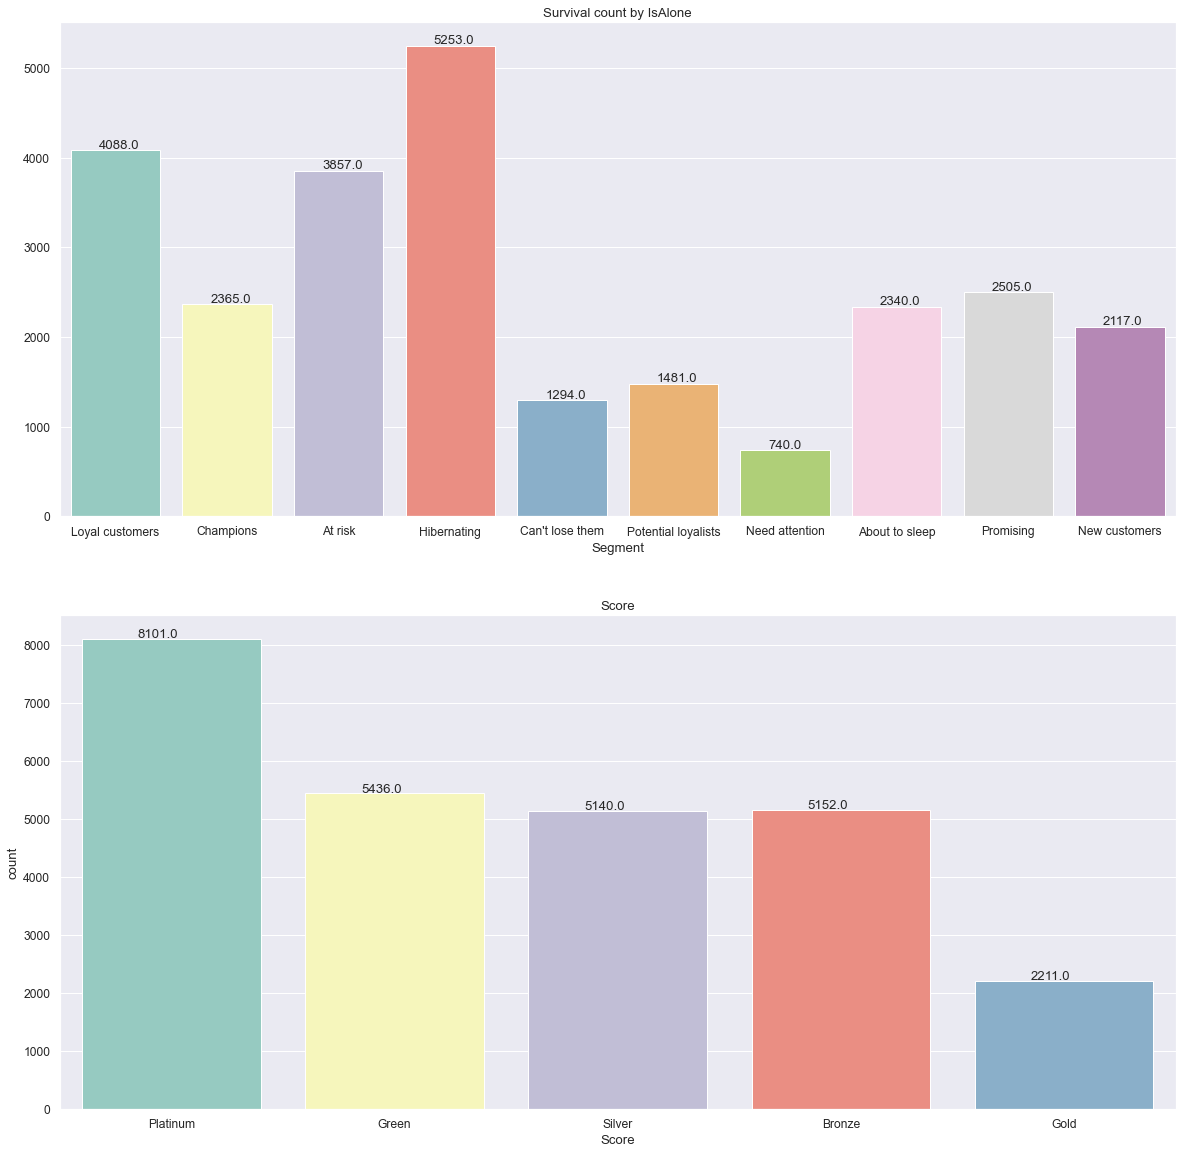

In [334]:
sns.set(font_scale=1.1)

#Pie Chart
f,ax=plt.subplots(2,1,figsize=(20,20))

# Assuming 'Segment' is one of the columns in your DataFrame
sns.countplot(x='Segment', data=sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score', 'Segment', 'Score']], ax=ax[0], palette="Set3")
ax[0].set_title('Segment')
ax[0].set_ylabel('')
ax[0].set_title('Survival count by IsAlone')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#Bar chart - count
sns.countplot(x='Score', data=sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score', 'Segment', 'Score']],ax=ax[1],palette="Set3")
ax[1].set_title('Score')

for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))


plt.show()

In [335]:
# Aggregate data by each customer
fig3 = sales_df.groupby('Segment').agg({'ClientID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'ClientID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

Segment  Count  percent
0   About to sleep   2340      9.0
1          At risk   3857     14.8
2  Can't lose them   1294      5.0
3        Champions   2365      9.1
4      Hibernating   5253     20.2

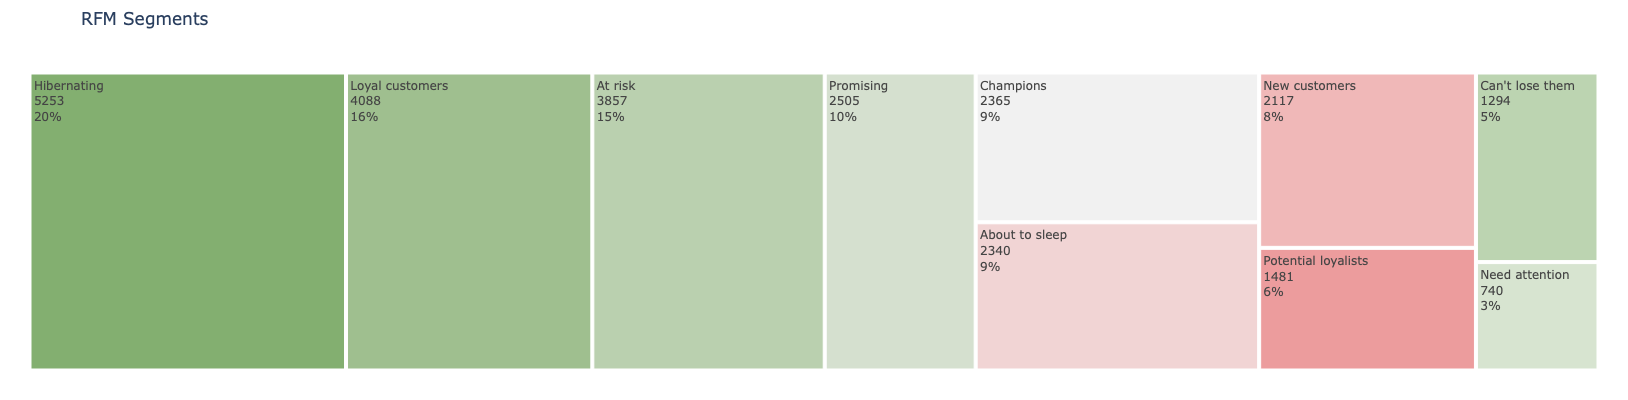

In [336]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#83af70','#9fbf8f','#bad0af','#d5e0cf','#f1f1f1','#f1d4d4','#f0b8b8','#ec9c9d'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Segment'],values='Count'
                 , width=800, height=400
                 ,title="RFM Segments")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [337]:
# Aggregate data by each customer
fig4 = sales_df.groupby('Score').agg({'ClientID': lambda x: len(x)}).reset_index()


# Rename columns
fig4.rename(columns={'ClientID': 'Count'}, inplace=True)
fig4['percent'] = (fig4['Count'] / fig4['Count'].sum()) * 100
fig4['percent'] = fig4['percent'].round(1)

fig4.head()

Score  Count  percent
0    Bronze   5152     19.8
1      Gold   2211      8.5
2     Green   5436     20.9
3  Platinum   8101     31.1
4    Silver   5140     19.7

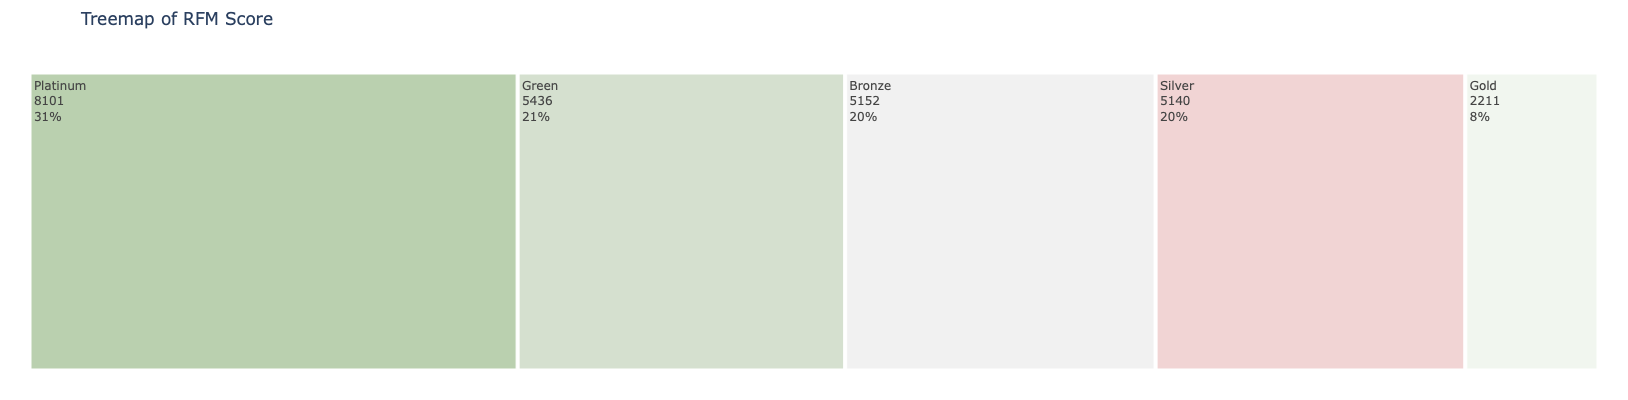

In [338]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig4, path=['Score'],values='Count'
                 , width=800, height=400
                 ,title="Treemap of RFM Score")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

## RFM Interpretation

In [339]:
# Aggregate data by each customer
rfm1 = sales_df.groupby(['Cluster', 'Segment', 'Score']).agg({'ClientID': lambda x: len(x)}).reset_index()

# Rename columns
rfm1.rename(columns={'ClientID': 'Count'}, inplace=True)
rfm1['percent'] = (rfm1['Count'] / rfm1.groupby('Cluster')['Count'].transform('sum')) * 100
rfm1['percent'] = rfm1['percent'].round(1)

rfm1

Cluster              Segment     Score  Count  percent
0         0       About to sleep    Bronze   1190      9.3
1         0       About to sleep     Green    854      6.7
2         0       About to sleep    Silver    237      1.9
3         0              At risk    Bronze   1282     10.1
4         0              At risk      Gold     46      0.4
5         0              At risk     Green    167      1.3
6         0              At risk    Silver   1223      9.6
7         0      Can't lose them    Silver     13      0.1
8         0          Hibernating    Bronze    766      6.0
9         0          Hibernating     Green   4415     34.7
10        0          Hibernating    Silver     13      0.1
11        0      Loyal customers      Gold    282      2.2
12        0      Loyal customers  Platinum    108      0.8
13        0      Loyal customers    Silver    120      0.9
14        0       Need attention    Bronze     56      0.4
15        0       Need attention      Gold     94      0.7
16        0       Need attention    Silver    434      3.4
17        0  Potential loyalists      Gold    106      0.8
18        0  Potential loyalists  Platinum     25      0.2
19        0  Potential loyalists    Silver    108      0.8
20        0            Promising    Bronze    875      6.9
21        0            Promising    Silver    315      2.5
22        1      Can't lose them  Platinum    157      7.6
23        1            Champions  Platinum   1002     48.5
24        1      Loyal customers  Platinum    907     43.9
25        2       About to sleep    Silver     59      1.2
26        2              At risk      Gold    478      9.4
27        2              At risk  Platinum    146      2.9
28        2              At risk    Silver    515     10.2
29        2      Can't lose them      Gold    256      5.1
30        2      Can't lose them  Platinum    763     15.1
31        2      Can't lose them    Silver    105      2.1
32        2            Champions  Platinum     44      0.9
33        2          Hibernating    Bronze     22      0.4
34        2          Hibernating    Silver     37      0.7
35        2      Loyal customers      Gold    125      2.5
36        2      Loyal customers  Platinum   2227     44.0
37        2       Need attention      Gold     64      1.3
38        2       Need attention  Platinum     92      1.8
39        2  Potential loyalists  Platinum    106      2.1
40        2            Promising      Gold     23      0.5
41        3            Champions      Gold     21      0.3
42        3            Champions  Platinum   1298     21.0
43        3      Loyal customers      Gold     13      0.2
44        3      Loyal customers  Platinum    299      4.8
45        3      Loyal customers    Silver      7      0.1
46        3        New customers    Bronze    399      6.5
47        3        New customers      Gold    372      6.0
48        3        New customers  Platinum    137      2.2
49        3        New customers    Silver   1209     19.6
50        3  Potential loyalists      Gold    235      3.8
51        3  Potential loyalists  Platinum    790     12.8
52        3  Potential loyalists    Silver    111      1.8
53        3            Promising    Bronze    562      9.1
54        3            Promising      Gold     96      1.6
55        3            Promising    Silver    634     10.3

In [340]:
sales_df['Cluster Segment'].value_counts()

Churned Customers    12729
New Customers         6183
At Risk Customers     5062
Loyal Customers       2066
Name: Cluster Segment, dtype: int64

In [485]:
rfmseg_df = sales_df.groupby(['Segment']).agg({'ClientID': lambda x: len(x), 'Recency': 'mean', 'Frequency': 'mean', 'Monetary': 'mean' }).reset_index()
rfmseg_df.rename(columns={'ClientID': 'Customer_Count', 'Recency': 'Avg_Days_Since_Last_Visit', 'Frequency': 'Avg_Visits', 'Monetary': 'Avg_Bill_Value'}, inplace=True)
rfmseg_df

Segment  Customer_Count  Avg_Days_Since_Last_Visit  Avg_Visits  \
0       About to sleep            2340                1775.853419    1.000000   
1              At risk            3857                2869.410941    3.057817   
2      Can't lose them            1295                2708.406491   14.706337   
3            Champions            2367                 169.427968   16.302070   
4          Hibernating            5253                2882.744146    1.000000   
5      Loyal customers            4088                1389.230431   13.111301   
6       Need attention             742                1768.411051    2.000000   
7        New customers            2117                 230.909306    1.000000   
8  Potential loyalists            1479                 584.433401    2.000000   
9            Promising            2506                 914.987630    1.000000   

   Avg_Bill_Value  
0      820.165517  
1     1842.028354  
2     7653.511747  
3    13778.956274  
4      555.091930  
5     8874.347943  
6     1937.509272  
7     1358.405919  
8     2760.232475  
9     1133.393691

In [486]:
population_avg = sales_df[sales_df['Segment'] == 'Hibernating'][['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
population_avg

Recency      2882.744146
Frequency       1.000000
Monetary      555.091930
Cluster         1.000000
dtype: float64

In [487]:
population_avg = sales_df[sales_df['Score'] == 'Platinum'][['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
population_avg

Recency       1049.217697
Frequency       13.337529
Monetary     10384.897624
Cluster          0.286772
dtype: float64

In [488]:
population_avg = sales_df[sales_df['Score'] == 'Gold'][['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
population_avg

Recency      1626.953846
Frequency       3.649774
Monetary     2703.944281
Cluster         0.683710
dtype: float64

In [489]:
population_avg = sales_df[sales_df['Score'] == 'Silver'][['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
population_avg

Recency      1602.559035
Frequency       2.145108
Monetary     1432.828090
Cluster         0.646178
dtype: float64

In [490]:
population_avg = sales_df[sales_df['Score'] == 'Bronze'][['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
population_avg

Recency      1855.185911
Frequency       1.338444
Monetary      637.001630
Cluster         0.911702
dtype: float64

In [491]:
population_avg = sales_df[sales_df['Score'] == 'Green'][['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
population_avg

Recency      2761.806843
Frequency       1.030721
Monetary      220.644110
Cluster         1.000000
dtype: float64

In [492]:
sales_df[sales_df['Score'] == 'Silver'].sample(10)

ClientID  NumServicesT  TotalSpend  NumVisits  \
79362     surya kumar8056008486           6.0      877.26        6.0   
271163        Sujatha9786391010           6.0     1657.90        1.0   
228890          nisha8939895042           2.0      472.00        2.0   
255152   janaki raman8667656550           1.0     1947.00        1.0   
289502         STALIN9342676932           3.0     1239.00        1.0   
272354       praveen 7358789499           4.0     1239.00        1.0   
4011            vijay9884368999           9.0     1275.16        8.0   
202247  Sathish Kumar9566128348           3.0      483.80        3.0   
225583    vigneshraja9715617775           2.0      448.40        2.0   
278757         sakthi9943468180           2.0     1221.30        1.0   

        avg_yrly_services  avg_mnthly_services Sex   HomePhone  Recency  \
79362                 3.0                1.500   F  8056008486   3067.0   
271163                6.0                6.000   F  9786391010    614.0   
228890                1.0                1.000   F  8939895042   1596.0   
255152                1.0                1.000   F  8667656550   1112.0   
289502                3.0                3.000   M  9342676932     46.0   
272354                4.0                4.000   M  7358789499    584.0   
4011                  4.5                1.125   M  9884368999   3439.0   
202247                1.5                1.000   M  9566128348   2065.0   
225583                2.0                1.000   M  9715617775   1788.0   
278757                2.0                2.000   M  9943468180    437.0   

        Monetary  ...  Cluster    Cluster Segment NumServices  R  F  M  \
79362     877.26  ...        1  Regular Customers         6.0  1  4  3   
271163   1657.90  ...        0      New Customers         6.0  4  1  4   
228890    472.00  ...        1  Regular Customers         2.0  3  3  2   
255152   1947.00  ...        1  Regular Customers         1.0  4  1  4   
289502   1239.00  ...        0      New Customers         3.0  5  1  3   
272354   1239.00  ...        0      New Customers         4.0  4  1  3   
4011     1275.16  ...        1  Regular Customers         9.0  1  5  3   
202247    483.80  ...        1  Regular Customers         3.0  3  4  2   
225583    448.40  ...        1  Regular Customers         2.0  3  3  2   
278757   1221.30  ...        0      New Customers         2.0  5  1  3   

        RFM_Segment RFM_Score          Segment   Score  
79362           143         8          At risk  Silver  
271163          414         9        Promising  Silver  
228890          332         8   Need attention  Silver  
255152          414         9        Promising  Silver  
289502          513         9    New customers  Silver  
272354          413         8        Promising  Silver  
4011            153         9  Can't lose them  Silver  
202247          342         9  Loyal customers  Silver  
225583          332         8   Need attention  Silver  
278757          513         9    New customers  Silver  

[10 rows x 21 columns]

In [498]:
sales_df[sales_df['Cluster Segment'] == 'Regular Customers']

ClientID  NumServicesT  TotalSpend  NumVisits  \
341        Sudeep9381057770           2.0      219.11        2.0   
343         Vijay7418633558           1.0      146.07        1.0   
344        Venkat9940047675           1.0       67.42        1.0   
345        Aarthi9940092717           4.0     1053.26        4.0   
350        Anitha9962888038          20.0     3585.48       14.0   
...                     ...           ...         ...        ...   
280710   sanjitha9884770609           1.0       64.90        1.0   
280732    Nandini8754662059           1.0       64.90        1.0   
280742    Sundhri9566590848           1.0       64.90        1.0   
280778  Keerthana9175038875           1.0       64.90        1.0   
281099    saranya9600880317           1.0       53.10        1.0   

        avg_yrly_services  avg_mnthly_services Sex   HomePhone  Recency  \
341              1.000000             1.000000   F  9381057770   3587.0   
343              1.000000             1.000000   M  7418633558   3730.0   
344              1.000000             1.000000   M  9940047675   3730.0   
345              2.000000             1.333333   F  9940092717   3490.0   
350              6.666667             2.222222   F  9962888038   2401.0   
...                   ...                  ...  ..         ...      ...   
280710           1.000000             1.000000   M  9884770609    388.0   
280732           1.000000             1.000000   F  8754662059    387.0   
280742           1.000000             1.000000   F  9566590848    387.0   
280778           1.000000             1.000000   F  9175038875    384.0   
281099           1.000000             1.000000   F  9600880317    373.0   

        Monetary  ...  Cluster    Cluster Segment NumServices  R  F  M  \
341       219.11  ...        1  Regular Customers         2.0  1  3  1   
343       146.07  ...        1  Regular Customers         1.0  1  1  1   
344        67.42  ...        1  Regular Customers         1.0  1  1  1   
345      1053.26  ...        1  Regular Customers         4.0  1  4  3   
350      3585.48  ...        1  Regular Customers        20.0  2  5  4   
...          ...  ...      ...                ...         ... .. .. ..   
280710     64.90  ...        1  Regular Customers         1.0  5  1  1   
280732     64.90  ...        1  Regular Customers         1.0  5  1  1   
280742     64.90  ...        1  Regular Customers         1.0  5  1  1   
280778     64.90  ...        1  Regular Customers         1.0  5  1  1   
281099     53.10  ...        1  Regular Customers         1.0  5  1  1   

        RFM_Segment RFM_Score          Segment     Score  
341             131         5          At risk     Green  
343             111         3      Hibernating     Green  
344             111         3      Hibernating     Green  
345             143         8          At risk    Silver  
350             254        11  Can't lose them  Platinum  
...             ...       ...              ...       ...  
280710          511         7    New customers    Bronze  
280732          511         7    New customers    Bronze  
280742          511         7    New customers    Bronze  
280778          511         7    New customers    Bronze  
281099          511         7    New customers    Bronze  

[17287 rows x 21 columns]

In [499]:
sales_df[sales_df['Cluster Segment'] == 'New Customers']

ClientID  NumServicesT  TotalSpend  NumVisits  \
0                  JERRY9940060569          70.0    15926.10       38.0   
73               Saranya9884402095          45.0    16336.90       25.0   
123     Lakshmi rajkumar9176222704          86.0    35250.54       46.0   
213             Vaishali8056111666         116.0    30872.30       68.0   
371             bharathi9940008408          47.0     7475.87       31.0   
...                            ...           ...         ...        ...   
290200           LAVANYA8838935517           1.0       53.10        1.0   
290201           YUVASRI7358451127           1.0       64.90        1.0   
290202          PRASANTH9789074070           2.0     1180.00        1.0   
290204           SUMANTH9941060550           3.0     1233.10        1.0   
290207           kishore9442293006           3.0     1699.20        1.0   

        avg_yrly_services  avg_mnthly_services Sex   HomePhone  Recency  \
0               11.666667             6.363636   M  9940060569   1466.0   
73               9.000000             5.000000   F  9884402095   2098.0   
123             12.285714             7.818182   F  9176222704    218.0   
213             14.500000             9.666667   F  9884018330    759.0   
371              6.714286             3.916667   M  9940008408   1252.0   
...                   ...                  ...  ..         ...      ...   
290200           1.000000             1.000000   M  8838935517      1.0   
290201           1.000000             1.000000   F  7358451127      1.0   
290202           2.000000             2.000000   M  9789074070      1.0   
290204           3.000000             3.000000   M  9941060550      1.0   
290207           3.000000             3.000000   M  9442293006      0.0   

        Monetary  ...  Cluster  Cluster Segment NumServices  R  F  M  \
0       15926.10  ...        0    New Customers        70.0  3  5  5   
73      16336.90  ...        0    New Customers        45.0  3  5  5   
123     35250.54  ...        0    New Customers        86.0  5  5  5   
213     30872.30  ...        0    New Customers       116.0  4  5  5   
371      7475.87  ...        0    New Customers        47.0  4  5  5   
...          ...  ...      ...              ...         ... .. .. ..   
290200     53.10  ...        0    New Customers         1.0  5  1  1   
290201     64.90  ...        0    New Customers         1.0  5  1  1   
290202   1180.00  ...        0    New Customers         2.0  5  1  3   
290204   1233.10  ...        0    New Customers         3.0  5  1  3   
290207   1699.20  ...        0    New Customers         3.0  5  1  4   

        RFM_Segment RFM_Score          Segment     Score  
0               355        13  Loyal customers  Platinum  
73              355        13  Loyal customers  Platinum  
123             555        15        Champions  Platinum  
213             455        14  Loyal customers  Platinum  
371             455        14  Loyal customers  Platinum  
...             ...       ...              ...       ...  
290200          511         7    New customers    Bronze  
290201          511         7    New customers    Bronze  
290202          513         9    New customers    Silver  
290204          513         9    New customers    Silver  
290207          514        10    New customers      Gold  

[8755 rows x 21 columns]

In [494]:
len(sales_df)

26044

In [518]:
len(df1['ClientID'].unique())

26703

In [519]:
missing_clients = df1[~df1['ClientID'].isin(sales_df['ClientID'])]['ClientID']

In [521]:
len(missing_clients)

659

In [522]:
missing_clients

4                         0
36           aalm9012094214
252       Abinesh7397312724
258        abinya8122824810
301      abisheik8098932640
                ...        
26572      yamuna9566290089
26583        YASH9597797832
26602     yasotha9941441324
26672        yuih9840123555
26717         yyy9840000000
Name: ClientID, Length: 659, dtype: object

In [524]:
df4[df4['ClientID'] == 'aalm9012094214']

Empty DataFrame
Columns: [ÿSalonID, TicketID, ClientID, SchDate, Referral, Total, Created_Date, Total_WithoutTax, printed, bomreferenceindex, TimeMark, RowNo, Status, Serviceslipno, servicedesc, BillStatus, NumVisits, TotalSpend, Recency]
Index: []

In [525]:
len(df4['ClientID'].unique())

26045